In [4]:
library(ggplot2)
library(tidyverse)
library(dplyr) 

In [11]:
df = read_csv('/home/fer/Documents/cfDNA/OncoprintAll_mergeDirectionality/CountTypes.csv')
head(df)

Rows: 120 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): chr, gene, CNV, Type
dbl (1): Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


chr,gene,CNV,Type,Count
<chr>,<chr>,<chr>,<chr>,<dbl>
chr1,AKT3,;loss_cfDNA,Luminal A,1
chr1,ARID1A,loss_tumor;,Luminal A,1
chr1,ARID1A,;loss_cfDNA,Luminal A,1
chr1,CDKN2C,loss_tumor;,Luminal A,1
chr1,FUBP1,;loss_cfDNA,Luminal A,1
chr1,MTOR,loss_tumor;,Luminal A,1


In [12]:
plotchr <- function(df, chrom) {
    df_i = filter(df, chr == chrom)
    
    df_i_cfDNA = df_i %>% filter(CNV %in% c(";loss_cfDNA", "loss_tumor;loss_cfDNA"))
    df_i_tumor = df_i %>% filter(CNV%in% c("loss_tumor;", "loss_tumor;loss_cfDNA", "gain_tumor;"))
    

    theme_set(theme_bw(base_size = 10))
    
    cfDNA_id = paste("cfDNA", chrom, sep = " ")
    tumor_id = paste("Tumor", chrom, sep = " ")
    
    options(repr.plot.width = 8, repr.plot.height = 5)
    
    p <- ggplot(df_i_cfDNA, aes(fill=Type, y=Count, x=gene)) + 
    geom_bar(position="fill", stat="identity")+ ggtitle(cfDNA_id) +
    xlab("Gene") + ylab("CNV Relative Frequency")
    
    p2 <- ggplot(df_i_tumor, aes(fill=Type, y=Count, x=gene)) + 
    geom_bar(position="fill", stat="identity")+ ggtitle(tumor_id) +
    xlab("Gene") + ylab("CNV Relative Frequency") 
    
  return (list(p, p2))
}

In [24]:
pdf("/home/fer/Tumor_chrX.pdf", width = 8, height = 5)
x = plotchr(df, 'chrX')
x[2]
dev.off()

[[1]]


png 
  2

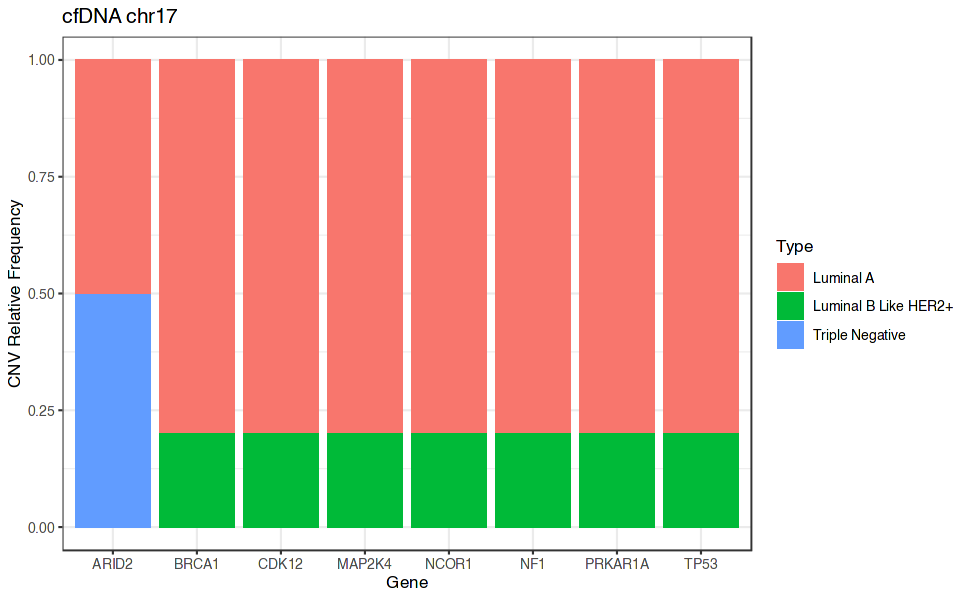

In [34]:
#options(repr.plot.width = 8, repr.plot.height = 5)
#pdf("/home/fer/Oncoprint.pdf", width = 20, height = 20)

#theme_set(theme_bw(base_size = 10))

#ggplot(df_chr1_cfDNA, aes(fill=Type, y=Count, x=gene)) + 
#    geom_bar(position="fill", stat="identity")+ ggtitle("cfDNA chr17") +
#  xlab("Gene") + ylab("CNV Relative Frequency")

#dev.off()